In [123]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential 

import random
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.layers import Conv2D
from keras.layers import MaxPooling2D






Step 1 - Load the data 
Reference: https://www.analyticsvidhya.com/blog/2020/12/mlp-multilayer-perceptron-simple-overview/


https://becominghuman.ai/simple-neural-network-on-mnist-handwritten-digit-dataset-61e47702ed25


Decay code ref:
https://towardsdatascience.com/learning-rate-schedule-in-practice-an-example-with-keras-and-tensorflow-2-0-2f48b2888a0c

early stopping and checkpoint
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

Reshaping:
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

In [124]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1

In [125]:
num_labels = len(np.unique(y_train))
print("total labels:{}".format(num_labels))
print("labels:{}".format(np.unique(y_train)))

total labels:10
labels:[0 1 2 3 4 5 6 7 8 9]


In [126]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


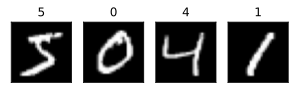

In [127]:
# Display some images
fig, axes = plt.subplots(ncols=4, sharex=False, 
    sharey=True, figsize=(5, 5))
for i in range(4):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [128]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

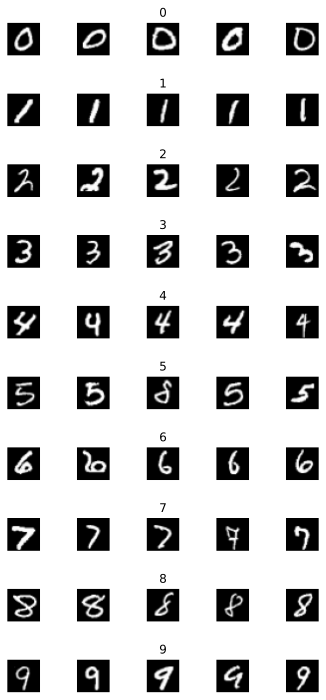

In [129]:
num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

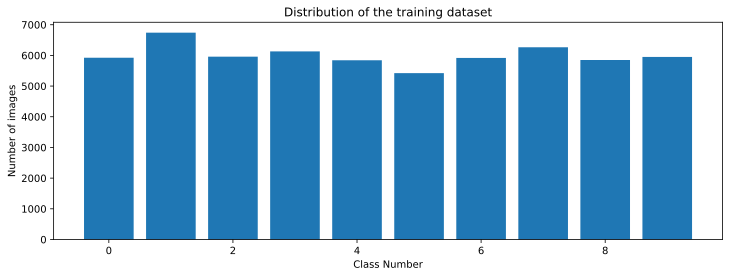

In [130]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [131]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [132]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [133]:
!pip install livelossplot

In [134]:
from livelossplot import PlotLossesKeras

In [157]:
def create_model():
  model = Sequential()
 # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
  model.add(Dense(32, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
  model.add(Dense(64, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.add(Dense(10, activation='sigmoid')),
  model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
  return model

In [158]:
model = create_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_62 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_63 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
Total params: 27,992
Trainable params: 27,992
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


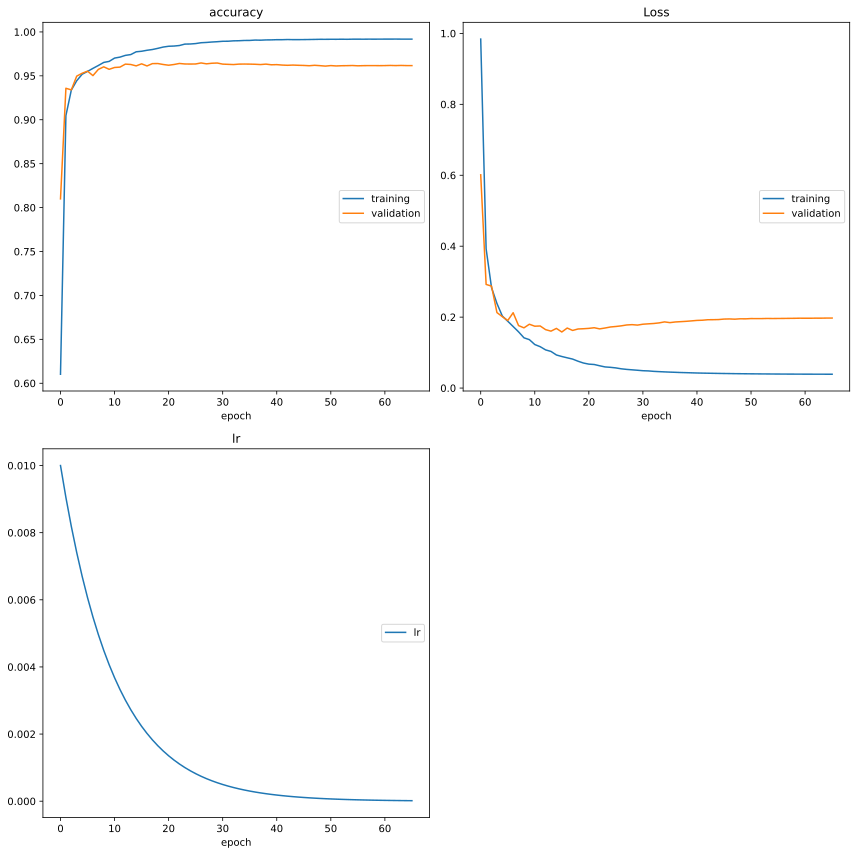

accuracy
	training         	 (min:    0.610, max:    0.992, cur:    0.992)
	validation       	 (min:    0.810, max:    0.965, cur:    0.962)
Loss
	training         	 (min:    0.039, max:    0.984, cur:    0.039)
	validation       	 (min:    0.158, max:    0.601, cur:    0.197)
lr
	lr               	 (min:    0.000, max:    0.010, cur:    0.000)

Epoch 00066: val_accuracy did not improve from 0.96467
Epoch 00066: early stopping


In [159]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from numpy import math
from keras.models import load_model

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Fit the model to the training data
history_exp_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=48,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1),PlotLossesKeras(), EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50),ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)],
)

Loss goes down around epoch 5

In [160]:
# load the saved model
saved_model = load_model('best_model.h5')

In [161]:
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.984, Test: 0.960


In [162]:
from matplotlib import pyplot

# plot diagnostic learning curves
def summarize_diagnostics(history):
	for i in range(len(history)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(history[i].history['loss'], color='blue', label='train')
		pyplot.plot(history[i].history['val_loss'], color='orange', label='test')
	

In [163]:
pyplot.show()

In [164]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [165]:


def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



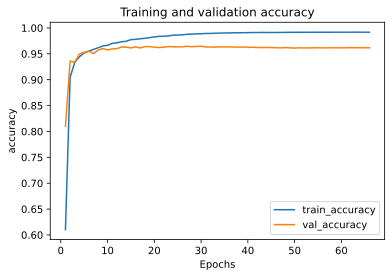

In [166]:
plot_metric(history_exp_decay, 'accuracy')